In [1]:
import lorm
from nfft import nfft
import disc.energy_curveling_so3
from pythreejs import *
from IPython.display import display
#from ipywidgets import VBox, HBox, Checkbox, jslink
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
def compute_quaternions(point_coords_9d):
    point_coords_4d = np.empty([point_coords_9d.shape[0],4])
    for i,p in enumerate(point_coords_9d):
        point_coords_4d[i,:] = lorm.manif.SO3.compute_quaternion_representation(p)
    return point_coords_4d

def compute_stereographicprojection(point_coords_4d):
    point_coords_3d = np.empty([point_coords_4d.shape[0],3])
    for i,p in enumerate(point_coords_4d):
        point_coords_3d[i,:] = lorm.manif.Sphere3.compute_stereographicprojection(p)
    return point_coords_3d

In [3]:
# legendre_p_n(1/2)
#int_pn = np.array([1.0,0.5,-0.125,-0.4375,-0.2890625,0.08984375,0.3232421875,0.22314453125,-0.073638916015625,-0.2678985595703125,-0.1882286071777344,0.06387138366699219,0.233752965927124,0.1658042669296265,-0.05717363953590393,-0.2100185006856918,-0.149855135474354,0.05221683974377811,0.1922962221433409,0.1377672102244105,-0.04835838106737356,-0.1784138579223509,-0.1281987246779863,0.04524493778421856,0.1671594460634509,0.1203811168693321,-0.04266414120839634,-0.1577966215046347,-0.1138384028125269,0.04047968696457777,0.1498488149006108,0.1082580079203644,-0.038599562888358,-0.1429921832522211,-0.103425075400988,0.03695911797832659,0.1369979535351437,0.09918640694089159,-0.03551142159254956,-0.1316993126940266,-0.09542943523261548,0.03422147270341801,0.1269713800411686,0.09206934414432813,-0.03306256526118129,-0.1227185621438446,-0.0890408508867776,0.03201392111450407,0.1188662759295311,0.08629277896094001,-0.03105909923960982])
# integrate(legendre_p_n(x),x,0,1)
int_pn = np.array([1., 0.5, 0., -0.125, 0., 0.0625, 0., -0.0390625, 0., 0.0273438, 0., -0.0205078, 0., 0.0161133, 0., -0.013092, 0., 0.01091, 0., -0.00927353, 0., 0.00800896, 0., -0.00700784, 0., 0.00619924, 0., -0.00553504, 0., 0.00498153, 0., -0.00451451, 0., 0.00411617, 0., -0.00377316, 0., 0.00347528, 0., -0.00321463, 0., 0.00298502, 0., -0.00278149, 0., 0.00260009, 0., -0.00243759, 0., 0.00229133, 0., -0.00215914, 0., 0.00203919, 0., -0.00192994, 0., 0.00183012, 0., -0.00173861, 0., 0.00165449, 0., -0.00157693, 0.])

In [41]:
so3 = lorm.manif.SO3()
points = lorm.manif.ManifoldPointArrayParameterized(so3)
m = 64
#points.coords = 0.3*(np.random.rand(m,3)-0.5)
points.coords = np.zeros([m,3,3])
local_coords = np.random.randn(m,3)
for i in range(m):
    local_coords[i,0] = np.sin(2*np.pi*i/m)+0.25*np.cos(6*np.pi*i/m)
    local_coords[i,1] = np.arccos(0.7)#np.sin(np.pi*(i+0.5)/M)
    local_coords[i,2] = np.cos(2*np.pi*i/m)
points.local_coords = local_coords
#points.coords = 0.4*np.loadtxt('s2_4design.txt')
#points.coords = np.loadtxt('data/so3_surface_20.txt')
points_new = lorm.manif.ManifoldPointArrayParameterized(so3)

In [ ]:
L = 16/1.08
#lengths = np.zeros(4)
for k in range(3*3+1):
    N = int(2*np.sqrt(L*1.08))
    m = points.coords.shape[0]
    energy = disc.energy_curveling_so3.plan(m,N,10/L**4,L)
    for n in range(np.min((N+1,len(int_pn)))):
        energy._mu_hat[n,0,0] = int_pn[n]
    energy._weights = np.real(energy._mu_hat[0,0,0])* np.ones([int(m),1],dtype=float) / int(m)

    points_new.coords = np.zeros([m,3,3])

    print(N,m,energy._equality_constraint)
    
    method= lorm.optim.ConjugateGradientMethod(max_iter=100,tol_grad=1e-12)
    points_new.coords = points.coords#[:] = points.coords[:]
    for i in range(2):
        points_new = method.run(energy,points_new)
        np.savetxt("data/so3_cylinder_{}.txt".format(k),compute_stereographicprojection(compute_quaternions(points_new.coords)))
    #lengths[k] = np.sum(energy._eval_lengths(points_new.local_coords))
    
    tempc = points_new.coords
    m2 = len(tempc)
    temp = np.zeros([2*m2,9])
    for i in range(m2):
        temp[2*i,:] = tempc[i,:]
    for i in range(m2-1):
        temp[2*i+1,:] = (tempc[i,:]+tempc[i+1,:])/2
    temp[2*m2-1,:] = (tempc[0,:]+tempc[m2-1,:])/2

    points.coords = temp
    L *= 2**(2./3.)  
    


8 64 False
Initial value: f[0] = 0.09117122459875661
f[1] = 0.016834492001915235
f[2] = 0.015987385608169258
f[3] = 0.013982031445697651
f[4] = 0.012149306845014746
f[5] = 0.010818972175795933
f[6] = 0.010010117974702045
f[7] = 0.009366426793947329
f[8] = 0.008571466518119492
f[9] = 0.007979091655733352
f[10] = 0.007556775323733345
f[11] = 0.007147230685231293
f[12] = 0.006804811130206383
f[13] = 0.006527291654864085
f[14] = 0.006345094582045804
f[15] = 0.006145860211280195
f[16] = 0.006015984084690983
f[17] = 0.005922377799529029
f[18] = 0.005832285597825056
f[19] = 0.005752598419589541
f[20] = 0.005660882607531328
f[21] = 0.005594859415353962
f[22] = 0.005539249887682973
f[23] = 0.005489913683733091
f[24] = 0.005452026149936225
f[25] = 0.00541540569669812
f[26] = 0.00539231681228434
f[27] = 0.005371493602876692
f[28] = 0.005347939858568602
f[29] = 0.005321365548552497
f[30] = 0.005303843691675076
f[31] = 0.005293150052917998
f[32] = 0.005285352943470961
f[33] = 0.005274820643809515
f

f[76] = 0.001557901342383743
f[77] = 0.001557187622555926
f[78] = 0.0015565524067507118
f[79] = 0.0015560804262675352
f[80] = 0.0015555968902459575
f[81] = 0.0015550814568313677
f[82] = 0.0015546012041726465
f[83] = 0.001554196291878439
f[84] = 0.001553919104956035
f[85] = 0.001553624674671301
f[86] = 0.001553324950336836
f[87] = 0.0015530971065976814
f[88] = 0.0015528855509939702
f[89] = 0.0015526218281062482
f[90] = 0.0015523226756623835
f[91] = 0.0015520904199884224
f[92] = 0.0015518172100034222
f[93] = 0.0015515700634421141
f[94] = 0.0015513404356757806
f[95] = 0.0015511731705045067
f[96] = 0.0015509586434655064
f[97] = 0.0015507546546630535
f[98] = 0.0015505853093795469
f[99] = 0.0015504056308081593
f[100] = 0.001550177424607765
Reached maximal iterations!
Initial value: f[0] = 0.001550177424607765
f[1] = 0.0015500609754773161
f[2] = 0.0015499324381115234
f[3] = 0.0015497465063997772
f[4] = 0.001549604977980558
f[5] = 0.0015494425988348984
f[6] = 0.0015492911825304902
f[7] = 0.001

f[44] = 0.0005976035595399075
f[45] = 0.0005970144531491411
f[46] = 0.0005964383167640977
f[47] = 0.0005959006866280978
f[48] = 0.0005953983823361626
f[49] = 0.0005949216031235277
f[50] = 0.000594431980486341
f[51] = 0.0005940379963427605
f[52] = 0.0005935237556044881
f[53] = 0.0005929527922477338
f[54] = 0.0005924638922925216
f[55] = 0.0005919176923260113
f[56] = 0.0005911596132265396
f[57] = 0.0005905529520015357
f[58] = 0.0005899971793847961
f[59] = 0.000589522855596388
f[60] = 0.0005890268476686442
f[61] = 0.0005885023987832779
f[62] = 0.0005879483600239772
f[63] = 0.0005875360622778858
f[64] = 0.0005871913451129712
f[65] = 0.0005867384465668186
f[66] = 0.0005861693547990952
f[67] = 0.0005856407644123785
f[68] = 0.0005851929441044044
f[69] = 0.0005848190086867838
f[70] = 0.0005843183407864246
f[71] = 0.0005839646801181505
f[72] = 0.0005835977177700868
f[73] = 0.000583258166815394
f[74] = 0.0005829846122838724
f[75] = 0.0005826588246251153
f[76] = 0.0005823171947216709
f[77] = 0.000

f[6] = 0.00013498306743746312
f[7] = 0.00012875165445169266
f[8] = 0.000124386294881587
f[9] = 0.00012123484895437854
f[10] = 0.0001184168089234855
f[11] = 0.00011504381838509135
f[12] = 0.00011196126622375502
f[13] = 0.00010949367180022377
f[14] = 0.00010746170310878484
f[15] = 0.00010556405963455139
f[16] = 0.00010402546119350847
f[17] = 0.00010274537353784763
f[18] = 0.00010172623656243294
f[19] = 0.00010082642408974023
f[20] = 0.00010005330606345127
f[21] = 9.942537426172573e-05
f[22] = 9.881452219161188e-05
f[23] = 9.81973965105098e-05
f[24] = 9.769356953388262e-05
f[25] = 9.726041781748681e-05
f[26] = 9.687107380061438e-05
f[27] = 9.647985844356299e-05
f[28] = 9.608965549106382e-05
f[29] = 9.575775541775931e-05
f[30] = 9.545649521138134e-05
f[31] = 9.517615141888967e-05
f[32] = 9.491296229014129e-05
f[33] = 9.465403760524653e-05
f[34] = 9.439985492774293e-05
f[35] = 9.416863169089779e-05
f[36] = 9.394589160717745e-05
f[37] = 9.373618808292614e-05
f[38] = 9.354415585579916e-05
f[3

f[75] = 3.4588554691426304e-05
f[76] = 3.455509923329252e-05
f[77] = 3.452767967163977e-05
f[78] = 3.449854394241835e-05
f[79] = 3.447001211943319e-05
f[80] = 3.4439222000599354e-05
f[81] = 3.4408487018775914e-05
f[82] = 3.438165331260553e-05
f[83] = 3.4359124050817606e-05
f[84] = 3.433377362333706e-05
f[85] = 3.43056093164453e-05
f[86] = 3.428117387095014e-05
f[87] = 3.4256416442148213e-05
f[88] = 3.4232611003594325e-05
f[89] = 3.42068934141801e-05
f[90] = 3.4183257781338126e-05
f[91] = 3.416243875965557e-05
f[92] = 3.4140621170998876e-05
f[93] = 3.411777010242586e-05
f[94] = 3.409578676392672e-05
f[95] = 3.407311983004246e-05
f[96] = 3.405162037301953e-05
f[97] = 3.402975905459549e-05
f[98] = 3.400849908984503e-05
f[99] = 3.3986261154044505e-05
f[100] = 3.396272176405551e-05
Reached maximal iterations!
Initial value: f[0] = 3.396272176405551e-05
f[1] = 3.395108387639259e-05
f[2] = 3.393702943733076e-05
f[3] = 3.391889880376011e-05
f[4] = 3.3902484666819416e-05
f[5] = 3.38875787563453

f[37] = 1.2968812726058392e-05
f[38] = 1.2964285346070933e-05
f[39] = 1.2959222762462514e-05
f[40] = 1.2954138652509186e-05
f[41] = 1.2949934691354149e-05
f[42] = 1.2945397139236567e-05
f[43] = 1.294119838870947e-05
f[44] = 1.2936966336824756e-05
f[45] = 1.2931592909725532e-05
f[46] = 1.2926539800863057e-05
f[47] = 1.2922050279912288e-05
f[48] = 1.2917910620577077e-05
f[49] = 1.291369131413015e-05
f[50] = 1.2909533939391639e-05
f[51] = 1.2905533113098789e-05
f[52] = 1.2901624337208937e-05
f[53] = 1.2897920082994736e-05
f[54] = 1.2894349482700402e-05
f[55] = 1.2891231027627094e-05
f[56] = 1.288803850151822e-05
f[57] = 1.288483544595896e-05
f[58] = 1.288156090061615e-05
f[59] = 1.2878378682294944e-05
f[60] = 1.2875518104718988e-05
f[61] = 1.2872806455428114e-05
f[62] = 1.287007770398849e-05
f[63] = 1.2867598781436952e-05
f[64] = 1.2865292457894371e-05
f[65] = 1.286258354096858e-05
f[66] = 1.2860062191121064e-05
f[67] = 1.2857514600064528e-05
f[68] = 1.2854879813391135e-05
f[69] = 1.28523

In [8]:
g1 = BufferGeometry(attributes={'position': BufferAttribute(compute_stereographicprojection(compute_quaternions(points_new.coords))
    , normalized=False) })
m1 = LineBasicMaterial(vertexColors='VertexColors', linewidth=3)
line1 = Line(g1,m1)

c = PerspectiveCamera(position=[0, 2, 2], up=[0, 2, 0],
                      children=[DirectionalLight(color='white', position=[3, 5, 1], intensity=0.5)])

scene = Scene(children=[line1, c, AmbientLight(color='#777777')])

renderer = Renderer(camera=c,
                    scene=scene, 
                    controls=[OrbitControls(controlling=c)])
renderer.width =400
renderer.height =400
display(renderer)

/home/grman/.local/lib/python3.7/site-packages/pythreejs/traits.py:177: UserWarning: 64-bit data types not supported for WebGL data, casting to 32-bit.
  warnings.warn('64-bit data types not supported for WebGL '


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.5, position=(3.0, 5.0,…

<IPython.core.display.Javascript object>


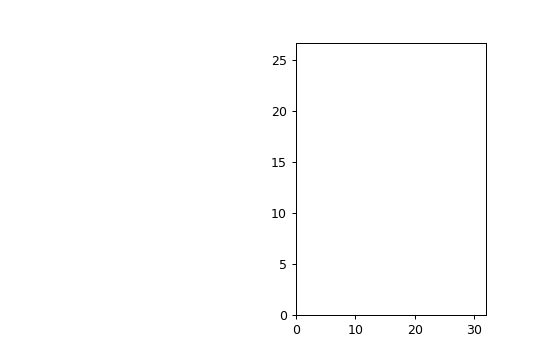

IndexError: too many indices for array

In [89]:
%matplotlib notebook
fig = plt.figure()

bx = fig.add_subplot(122)
#bx.axis(np.array([900,950,0.0045,0.0015]))
bx.axis(np.array([0,m,0.000,1.8*energy._L]))
bx.set_xlabel(np.sum(energy._eval_lengths(points_new.local_coords)))
distance = plt.Line2D(np.linspace(0,m,m),m*energy._eval_lengths(points_new.local_coords))
bx.add_line(distance)
def update_points(p):
    g1.attributes['position'].array = compute_stereographicprojection(compute_quaternions(p.coords))
    
    distance.set_ydata(m*energy._eval_lengths(p.local_coords))
    bx.set_xlabel(np.sum(energy._eval_lengths(p.local_coords)))
    fig.canvas.draw()
    return

In [86]:
#method = lorm.optim.SteepestDescentMethod(max_iter=100)
#energy._L = 60
#energy._alpha = 3200/L**5
method = lorm.optim.ConjugateGradientMethod(max_iter=50)
method.listener = update_points 
#points_new.coords = points.coords
for i in range(1):
    points_new = method.run(energy,points_new)

Initial value: f[0] = 0.0004514565327006855
f[1] = 0.0004512358053053858
f[2] = 0.00045029495527773263
f[3] = 0.0004495212566651684
f[4] = 0.0004490360534663737
f[5] = 0.0004486324796796496
f[6] = 0.00044821325385083145
f[7] = 0.0004479066593002991
f[8] = 0.00044758240598854137
f[9] = 0.00044737637470312745
f[10] = 0.00044705094370252996
f[11] = 0.0004468586499262312
f[12] = 0.00044666582471992815
f[13] = 0.0004464753885444993
f[14] = 0.0004462947807518191
f[15] = 0.00044606864676971606
f[16] = 0.0004458977436809673
f[17] = 0.0004457253635900165
f[18] = 0.00044558710038560846
f[19] = 0.0004453969264964641
f[20] = 0.0004452201011490307
f[21] = 0.00044509566954947636
f[22] = 0.00044498335813570434
f[23] = 0.00044482511676953164
f[24] = 0.00044464750801783754
f[25] = 0.00044453405738062966
f[26] = 0.00044441093935965485
f[27] = 0.00044428532651999853
f[28] = 0.00044415583985587783
f[29] = 0.00044400955964848623
f[30] = 0.00044385653100388205
f[31] = 0.0004437352196574614
f[32] = 0.0004436

In [61]:
np.savetxt('data/so3_surface_20.txt',points_new.coords)

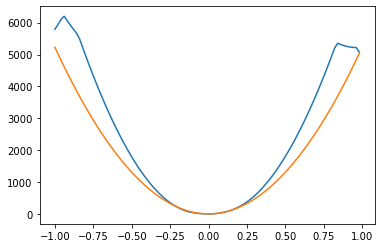

In [72]:
%matplotlib inline
v=energy.grad(points_new)
v.coords *= 10
#v.coords = 0.001*np.random.randn(m,3)
f,q, s = lorm.utils.eval_objective_function_with_quadratic_approximation(energy,v)
plt.plot(s,f,s,q)

In [80]:
tempc = points_new.coords
m2 = len(tempc)
temp = np.zeros([2*m2,9])
for i in range(m2):
    temp[2*i,:] = tempc[i,:]
for i in range(m2-1):
    temp[2*i+1,:] = (tempc[i,:]+tempc[i+1,:])/2
temp[2*m2-1,:] = (tempc[0,:]+tempc[m2-1,:])/2

m = len(temp)
points.coords = temp

In [39]:
m*energy._eval_lengths(points_new.local_coords)

array([23.19139035, 23.21109831, 23.2114838 , 23.25881566, 23.48106475,
       23.59199235, 23.40824064, 23.34544319, 23.24292059, 23.06044477,
       22.99612672, 23.0888276 , 23.17058895, 23.30641966, 23.41666286,
       23.36970803, 23.29039993, 23.13498471, 23.02172649, 23.10953684,
       23.272403  , 22.97574765, 22.85889602, 22.66346974, 22.62346559,
       22.66851271, 22.82737463, 22.87877679, 23.13634004, 23.04954465,
       23.04175314, 22.99116192, 23.01245609, 23.07229353, 23.06633818,
       23.12402263, 23.08082148, 22.96717899, 22.93509329, 23.06503368,
       22.96256297, 22.90080334, 22.84801122, 22.96118156, 22.90555673,
       23.01497891, 23.09794967, 23.20794992, 23.159909  , 23.18935268,
       23.19138436, 23.21110205, 23.21148826, 23.25881404, 23.48106216,
       23.59199142, 23.40824155, 23.3454443 , 23.2429177 , 23.06044656,
       22.99613277, 23.08882481, 23.17058269, 23.3064206 , 23.41666323,
       23.36971086, 23.29040515, 23.13497985, 23.02171791, 23.10

In [30]:
20**5

3200000

In [34]:
20**5

3200000